In [3]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt

## Task 1

In [28]:
image = cv.imread('./test1.png', 0)
cv.imshow('image', image)

k = cv.waitKey(0)
if k:
    cv.destroyAllWindows()

In [29]:
cap = cv.VideoCapture(0)

while(1):
    ret, frame = cap.read()
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    cv.imshow('image', frame)
    
    red1_l = np.array([0, 80, 70])
    red1_h = np.array([20, 255, 255])
    mask1 = np.zeros_like(hsv)
    mask1 = cv.inRange(hsv, red1_l, red1_h)
    
    red2_l = np.array([160, 80, 70])
    red2_h = np.array([180, 255, 255])
    mask2 = np.zeros_like(hsv)
    mask2 = cv.inRange(hsv, red2_l, red2_h)
    
    mask = mask1 + mask2
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, np.ones((3,3), np.uint8))

    redpart = cv.bitwise_and(frame, frame, mask=mask)
    hsv2 = cv.cvtColor(redpart, cv.COLOR_BGR2HSV)
    hsv2[:, :, 0] = 120
    redpart = cv.cvtColor(hsv2, cv.COLOR_HSV2BGR)
    
    frame = cv.bitwise_and(frame, frame, mask=cv.bitwise_not(mask))
    
    cv.imshow('hsv', redpart+frame)
    
    k = cv.waitKey(1) & 0xFF
    if k == ord('c'):
        break
        
cap.release()
cv.destroyAllWindows()

## Task 2

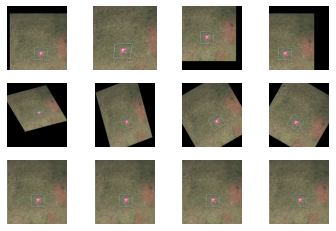

In [30]:
img = cv.imread('test.png')
rows,cols = img.shape[0], img.shape[1]

cv.imshow('img',img)

images = []

#1
M = np.float32([[1, 0, 20], [0, 1, 50]])
t1 = cv.warpAffine(img, M, (cols, rows))
images.append(t1)

#2
pts1 = np.float32([[40,20],[340,70],[50,380],[387,389]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)

t2 = cv.warpPerspective(img,M,(300,300))
images.append(t2)
#3
M = np.float32([[1, 0, -40], [0, 1, -60]])
t3 = cv.warpAffine(img, M, (cols, rows))
images.append(t3)

#4
M = np.float32([[1, 0, -100], [0, 1, 50]])
t4 = cv.warpAffine(img, M, (cols, rows))
images.append(t4)

#5 
pts1 = np.float32([[30,30],[300,30],[30,300]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)

t5 = cv.warpAffine(img, M, (cols,rows))
images.append(t5)

#6 
pts1 = np.float32([[60,140],[190,70],[200,200]])
pts2 = np.float32([[80,180],[150,80],[190,200]])

M = cv.getAffineTransform(pts1,pts2)

t6 = cv.warpAffine(img, M, (cols,rows))
images.append(t6)

#7
M = cv.getRotationMatrix2D((cols/2,rows/2),30,1)
t7 = cv.warpAffine(img, M, (cols,rows))
images.append(t7)

#8
M = cv.getRotationMatrix2D((cols/2,rows/2),-30,1)
t8 = cv.warpAffine(img, M, (cols,rows))
images.append(t8)

#9
kernel = np.ones((3,3),np.float32)/9
t9 = cv.filter2D(img, -1, kernel)
images.append(t9)

#10
t10 = cv.blur(img, (5, 5))
images.append(t10)

#11
t11 = cv.GaussianBlur(img, (5, 5), 0)
images.append(t11)

#12
t12 = cv.medianBlur(img, 5)
images.append(t12)

for i in range(12):
    plt.subplot(3,4,i+1)
    img2 = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.axis('off')
    
plt.show()

k = cv.waitKey(0)
if k == ord('c'):
    cv.destroyAllWindows()

## Task 3

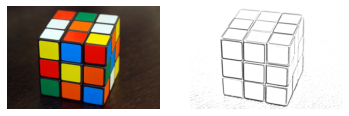

In [33]:
image = cv.imread('test1.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

def dodge(image, mask): 
    return cv.divide(image, 255-mask, scale=256)

inv = 255 - gray
blur = cv.GaussianBlur(inv, (17, 17), 0)

pen = dodge(gray, blur)
cv.imshow('edges', pen)

pen = cv.cvtColor(pen, cv.COLOR_GRAY2RGB)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.subplot(1, 2, 1), plt.imshow(image), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(pen), plt.axis('off')
plt.show()

k = cv.waitKey(0)
if k:
    cv.destroyAllWindows()

## Task 4

In [35]:
img = cv.imread('./shapes.png')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 240, 255, 0)
cv.imshow('image', thresh)

_, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, 
                                      cv.CHAIN_APPROX_NONE)
    

for cnt in contours[1:]:
    approx = cv.approxPolyDP(cnt, 0.01*cv.arcLength(cnt, True), True)
    cv.drawContours(img, [approx], -1, (255,0,0), 2)
    x, y = approx.ravel()[0], approx.ravel()[1]
    n = len(approx)
    if n == 3:
        cv.putText(img, 'triangle', (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0))
    elif n == 4:
        x1, y1, w, h = cv.boundingRect(cnt)
        aspectRatio = float(w)/float(h)
        _, _, angle = cv.minAreaRect(cnt)
        print(aspectRatio, angle)
        if abs(angle)>10:
            cv.putText(img, 'diamond', (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0))
        else:
            if aspectRatio<0.95 or aspectRatio>1.05:
                cv.putText(img, 'rectangle', (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0))
            else:
                cv.putText(img, 'square', (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0))
        #cv.putText(img, 'rectangle', (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0))
    elif n <= 14:
        cv.putText(img, 'oval', (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0))
    elif n > 14:
        cv.putText(img, 'circle', (x, y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0))
    
    print(len(approx), x, y)
cv.imshow('contours', img)

k = cv.waitKey(0)
if k:
    cv.destroyAllWindows()

0.9864864864864865 -0.0
4 57 404
0.7631578947368421 -52.8152961730957
4 320 371
3 121 226
1.376923076923077 0.0
4 243 222
16 105 34
13 325 16


## Task 5

In [27]:
vcap = cv.VideoCapture('messi.mp4')
img1 = cv.imread('ppp.jpg',0)          # queryImage

while True:
    ret, cimg = vcap.read()
    #print(ret)
    
    img = cv.cvtColor(cimg,cv.COLOR_BGR2GRAY)
    img = cv.medianBlur(img,5)
    #cv.imshow('detected', cimg)

    circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,5,
                                param1=220,param2=160,minRadius=0,maxRadius=0)
    
    if circles is not None and circles.shape[1]<=10:
        
        print(circles.shape)

        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            # draw the outer circle
            cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

    cv.imshow('detected', cimg)
    if cv.waitKey(1) & 0xFF == ord('c'):
        break
        
vcap.release()
cv.destroyAllWindows()

In [ ]:
vcap = cv.VideoCapture('messi.mp4')
img1 = cv.imread('ppp.jpg',0)          # queryImage

MIN_MATCH_COUNT = 10

# Initiate SIFT detector
sift = cv2.SIFT()

while True:
    ret, cimg = vcap.read()
    #print(ret)
    
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
        cv.imshow('detected', cimg)
    if cv.waitKey(1) & 0xFF == ord('c'):
        break
        
vcap.release()
cv.destroyAllWindows()